In [45]:
import numpy as np
import matplotlib.pyplot as plt


In [46]:
from sklearn.datasets import make_blobs

In [47]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=11)

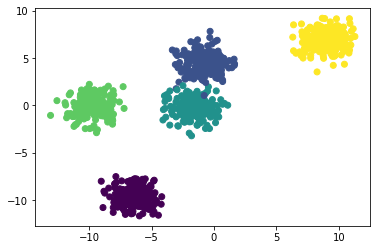

In [48]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()


In [49]:
#k-means implementation

In [50]:
#initial preparartion
k = 5
color=["green","red","blue","yellow","gray"]
clusters = {}
for i in range (k):
    #intialize centers randomly
    center=10*(2*np.random.random((x.shape[1], ))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster
    

In [51]:
10*(2*np.random.random((x.shape[1], ))-1)

array([4.50064526, 7.91795717])

In [52]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [53]:
#step-2-
#assign every data point to one of its cluster
#e-step

In [54]:
def assignPointTocluster(clusters):
    
    for i in range(x.shape[0]):
        dist=[]
        curr_x=x[i]
        
        for kx in range(k):
            d=distance(curr_x, clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
        

In [55]:
#step-3-
#update cluster center according to mean value of data points
#m step(m stands for maximization)

In [56]:
def updateClusterCenter(clusters):
    for kx in range(k):
            
            pts=np.array(clusters[kx]['points'])
            if pts.shape[0]>0:
                mu=pts.mean(axis=0)
                clusters[kx]['center']=mu
                clusters[kx]['points']=[]#center the list
                            

In [57]:
def plotCluster(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        #plot the points
        try:
            plt.scatter(pts[:,0], pts[:,1],color=clusters[kx]['color'])
        except:
            pass
    #plot cluster center
        uk=clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker="*")
        

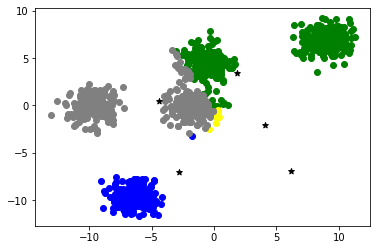

In [58]:
assignPointTocluster(clusters)
plotCluster(clusters)

In [59]:
#repeat these three function few times
count=1
while True:
    assignPointTocluster(clusters)
    updateClusterCenter(clusters)
    count+=1
    if count>2000:
        break

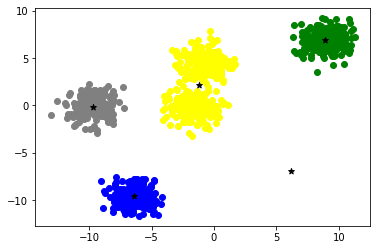

In [60]:

assignPointTocluster(clusters)
plotCluster(clusters)

In [61]:
from sklearn.datasets import make_moons

In [62]:
x, y=make_moons(n_samples=200,noise=0.10)

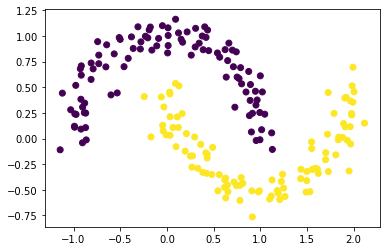

In [63]:
plt.scatter(x[:,0], x[:, 1], c=y)

In [71]:
from sklearn.cluster import KMeans 

In [72]:
km=KMeans(n_clusters=2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
center=km.cluster_centers_
labels=km.labels_

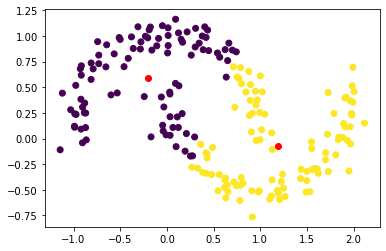

In [80]:
plt.scatter(x[:,0], x[:,1], c=labels)
plt.scatter(center[:,0], center[:, 1], color='red')
plt.show()

In [81]:
#to overcome the above k-means it modified to DBSCAN

In [82]:
#DBSCAN

In [113]:
from sklearn.cluster import DBSCAN

In [150]:
dbs=DBSCAN(eps=0.21, min_samples=5)

In [151]:
dbs.fit(x)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [152]:
ybs=dbs.fit_predict(x)

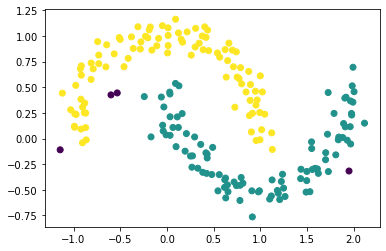

In [153]:
plt.scatter(x[:,0], x[:, 1],c=ybs)
plt.show()